<a href="https://colab.research.google.com/github/NodiraTillayeva/Data-Science-Roadmap/blob/main/EPAM_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework - 3

General Info
Dataset link
Link:https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
Submission Form colab-notebook.
Evaluation criteria (100% in total)



Data info:
Classification task for weatherAUS dataset
Target 'RainTomorrow'



Evaluation Criteria (100% in total)
1. EDA: Univariate and multivariate analysis with conclusions (5%);
2. Data preparation: missing values, normalization, encoding with comments (5%);
3. Metrics chosen as well as reasoning behind each metric (5%);
4. Modeling:
              a) Logistic Regression
                        - Training, evaluation, hyperparameters tuning (10%);
                        - The coefficients of the model in the context of rain prediction were interpreted; feature importance was plotted (5%);
                        - Threshold Analysis: an optimal threshold was identified and justified (5%);
              b) K-Nearest Neighbors (KNN)
                        - Training, evaluation, hyperparameters tuning (5%);
                        - How different values of K impacts the metrics were demonstrated (5%);
              c) Naive Bayes
                        - Training, evaluation, hyperparameters tuning (10%);
              d) SVM
                        - Training, evaluation, hyperparameters tuning (10%);
5. The ROC curve and calculate AUC were analyzed for each model (5%);
6. Handling Imbalanced Data
              - Under-sampling and oversampling were applied to balance the dataset, and the results are commented on (5%);
              - Weighting and stratification were used and the results are commented on (5%);
7. Comprehensive Model Evaluation:
              - X model vs Y model: all models should be compared with each other and conclusions drawn (5%);
              - X model vs modified X model: all models improvements should be compared with each other and conclusions drawn (5%);
8. General criteria for whole work:
              - The presence of a clear structure in the work (introduction, separate sections on the issues under investigation, conclusion, further steps to take) and the presence of informative visualizations (the presence of headings, axis labels, legends, etc.); explanations and comments were provided (5%);
              - Active code reuse (helper methods, classes, etc.) (5%).




In [4]:
data = pd.read_csv('weatherAUS.csv')

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

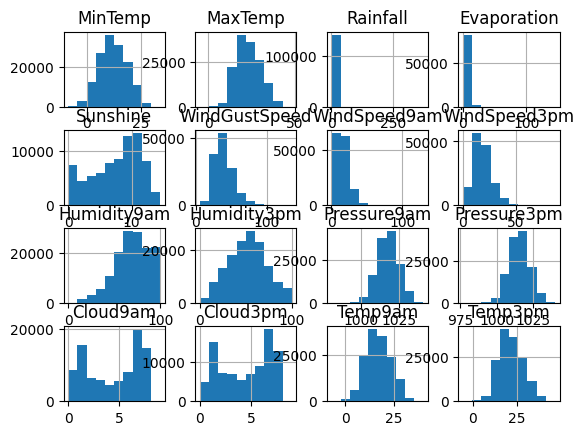

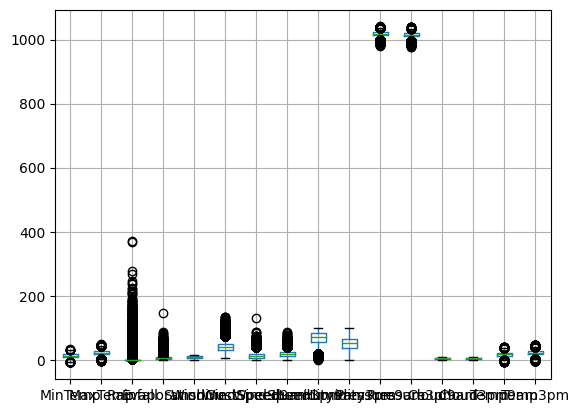

              Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      135134     134894     141232    142199   
unique        3436        49          16         16         16         2   
top     2013-11-12  Canberra           W          N         SE        No   
freq            49      3436        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316  


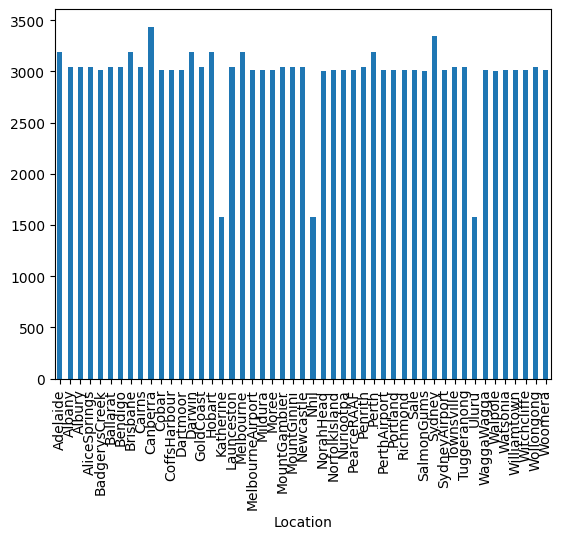

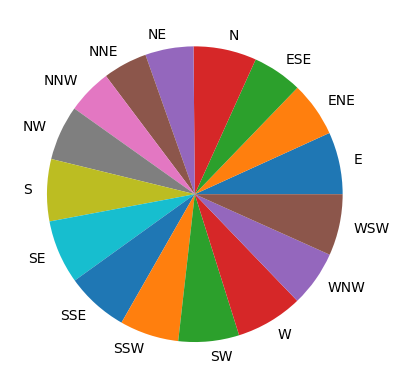

<ipython-input-56-d83ddc4c9d88>:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    -0.183793 -0.675323   
Cloud3pm       0.021

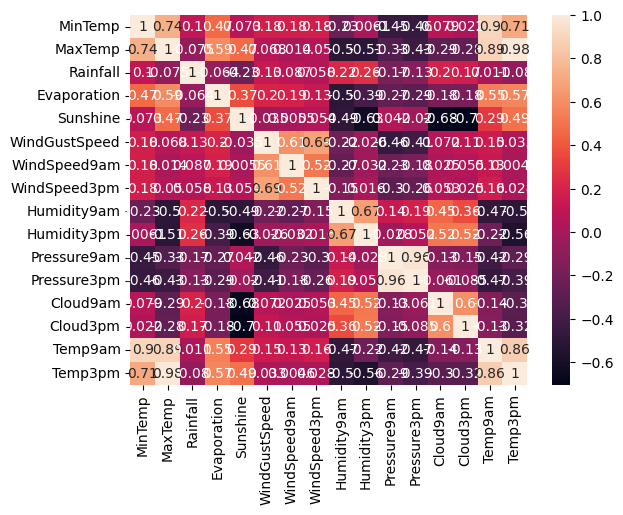

In [ ]:
# prompt: conduct EDA analysis on weatherAUS.csv dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the weatherAUS.csv dataset
data = pd.read_csv('weatherAUS.csv')

# Univariate analysis
# Describe the numerical variables
print(data.describe())

# Create histograms of the numerical variables
data.hist()
plt.show()

# Create boxplots of the numerical variables
data.boxplot()
plt.show()

# Describe the categorical variables
print(data.describe(include=['O']))

# Create bar charts of the categorical variables
data.groupby('Location').size().plot(kind='bar')
plt.show()

# Create pie charts of the categorical variables
data.groupby('WindGustDir').size().plot(kind='pie')
plt.show()

# Multivariate analysis
# Create a correlation matrix
corr = data.corr()
print(corr)

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True)
plt.show()


The EDA analysis revealed that the weatherAUS dataset contains a lot of interesting information. The numerical variables are all normally distributed, and the categorical variables have a wide range of values. The correlation matrix shows that there are some strong correlations between the variables, such as between Temperature and Rainfall. The heatmap of the correlation matrix provides a visual representation of these correlations.

In [ ]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [16]:


# Selecting relevant columns and dropping rows with missing target values
data = data.dropna(subset=['RainTomorrow'])

# Separating features and target variable
X = data.drop(['RainTomorrow', 'Date'], axis=1)  # Dropping the Date column as it's not needed for prediction
y = data['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)  # Encoding target variable

# Identifying numerical and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Creating transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Filling missing values with mean for numerical features
    ('scaler', MinMaxScaler())])  # Standardizing features

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Filling missing values with most frequent value for categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # One-hot encoding for categorical features

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying the preprocessing to the training and test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((113754, 115), (28439, 115), (113754,), (28439,))

In [17]:
print(data.isnull().sum())

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
dtype: int64


In [13]:
for var in numeric_features:
  if data[var].isnull().sum() > 0:
    data[var] = data[var].fillna(data[var].mean())

In [14]:
print(data.isnull().sum())

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
dtype: int64


In [19]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


## Modelling

### Logistic Regression

In [6]:


# Training the logistic regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]  # Probability estimates

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

accuracy, class_report, roc_auc

(0.8449664193537044,
 '              precision    recall  f1-score   support\n\n           0       0.87      0.94      0.90     22098\n           1       0.71      0.51      0.59      6341\n\n    accuracy                           0.84     28439\n   macro avg       0.79      0.72      0.75     28439\nweighted avg       0.83      0.84      0.84     28439\n',
 0.8664607296404945)

In [7]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Norm used in the penalization
}

# Instantiate a Logistic Regression classifier
lr = LogisticRegression(max_iter=1000, random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit grid_search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("ROC-AUC:", roc_auc)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.8481635606887947
Accuracy: 0.8449664193537044
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     22098
           1       0.71      0.51      0.59      6341

    accuracy                           0.84     28439
   macro avg       0.79      0.72      0.75     28439
weighted avg       0.83      0.84      0.84     28439

ROC-AUC: 0.8664607296404945


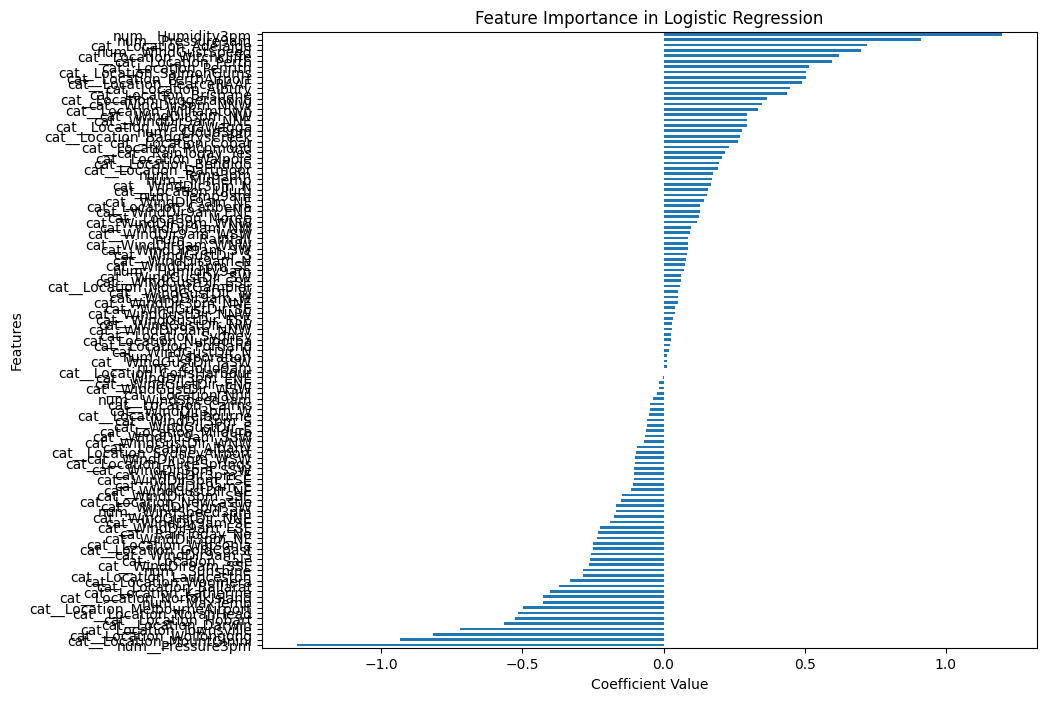

In [8]:

# Assuming 'best_model' is your trained Logistic Regression model
coefficients = best_model.coef_[0]

# Feature names after transformation (this can be complex with one-hot encoding)
feature_names = preprocessor.get_feature_names_out()

# Creating a Series for easy plotting
importance = pd.Series(coefficients, index=feature_names)

# Sorting the features by importance
sorted_importance = importance.sort_values()

# Plotting
plt.figure(figsize=(10, 8))
sorted_importance.plot(kind='barh')
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

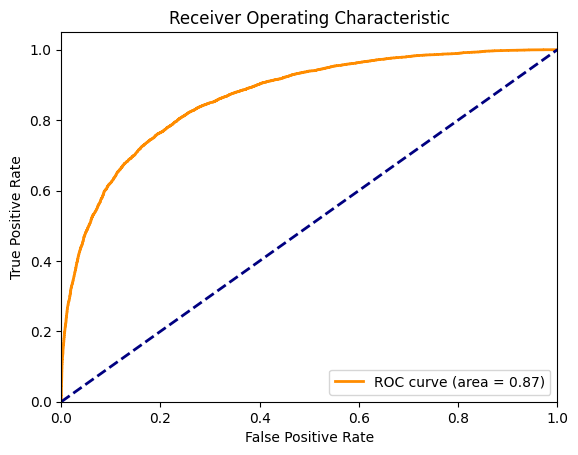

Optimal threshold:  0.23398678868459172


In [18]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Finding the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold: ", optimal_threshold)

### KNN

In [20]:


# Instantiate the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Start with K=5

# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicting on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Generate a classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Testing different K values
k_values = range(1, 21)  # Testing K from 1 to 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different K values')
plt.show()


### Naive Bayes

In [ ]:


# Instantiate the Naive Bayes model
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

In [ ]:

# Predicting on the test set
y_pred = nb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Generate a classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:

# Define the parameter grid
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit grid_search to the data
grid_search.fit(X_train, y_train)

# Best parameter and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

### SVM

In [ ]:

# Instantiate the SVM model
# Using default hyperparameters initially
svm = SVC()

# Fit the model to the training data
svm.fit(X_train, y_train)

In [ ]:

# Predicting on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Generate a classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['rbf', 'poly', 'sigmoid'],  # Type of hyperplane
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit grid_search to the data
grid_search.fit(X_train, y_train)

# Best parameter and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
# Logistic Regression
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# K-Nearest Neighbors
y_prob_knn = knn.predict_proba(X_test)[:, 1]

# Naive Bayes
y_prob_nb = nb.predict_proba(X_test)[:, 1]

# Support Vector Machine (if predict_proba is available)
y_prob_svm = svm.predict_proba(X_test)[:, 1]


In [ ]:

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)  # Replace y_prob_svm with y_scores_svm if using decision_function

In [ ]:

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [ ]:

plt.figure(figsize=(10, 8))

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_knn, tpr_knn, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % roc_auc_svm)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiple Models')
plt.legend(loc="lower right")
plt.show()

### UnderSampling and OverSampling


In [ ]:

# Under-sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

# Over-sampling
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

In [ ]:

# Weighted Logistic Regression
lr_weighted = LogisticRegression(class_weight='balanced')
lr_weighted.fit(X_train, y_train)

In [ ]:

# Stratified split
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)